<a href="https://colab.research.google.com/github/ManojKumarKarumanchi/ML_CS403/blob/main/Advertise_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')

print(f'\n shape : {data.shape} \n \n')
data.head()


 shape : (200, 5) 
 



,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
# Describe the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [21]:
X = data[['TV']]  # Feature
y = data['Sales']  # Target variable

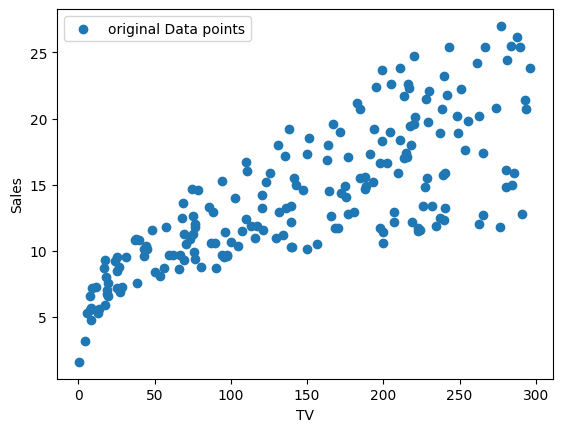

In [22]:
# Visualise the actual data

plt.scatter(X, y, label="original Data points")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Initialize and train the KNN regressor
k = 3  # Number of neighbors
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

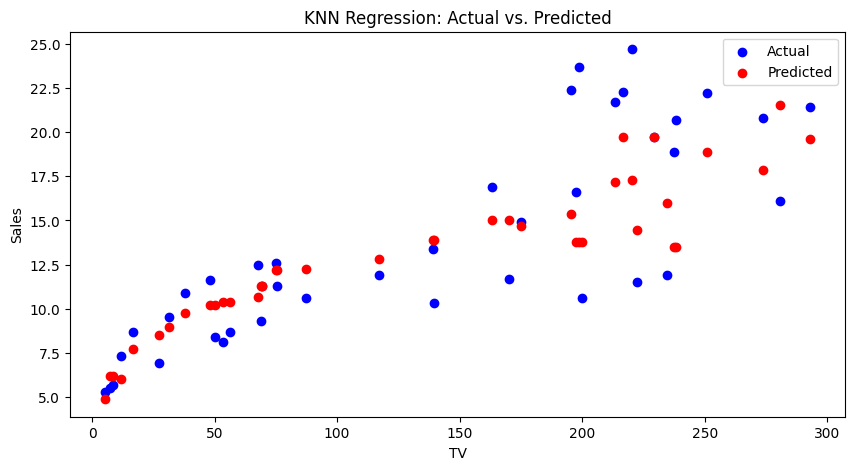

In [26]:
# Visualize the data and predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('KNN Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [30]:
# Calculate the RMSE
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 3.42
